<h1><b>Self-Organizing Maps (SOM)</b></h1>

Στην άσκηση αυτή θα μελετήσετε μία εφαρμογή των <i>Self-Organizing Maps</i> \(<i>SOM</i>) για τη συμπίεση εικόνων. Ως είσοδο θα χρησιμοποιήσετε τη φωτογραφία του διάσημου τενίστα <i>Rafael Nadal</i> (<a href="https://github.com/nkostopoulos/StochasticsLabPublic/tree/master/lab2/nadal.jpg">nadal.jpg</a>). Η άσκηση αυτή βασίστηκε στον κώδικα που παρέχεται <a href=https://github.com/JustGlowing/minisom/blob/master/examples/ColorQuantization.ipynb>εδώ</a>.

<h3><b>Κώδικας</b></h3>

In [2]:
!pip install minisom
!pip install numpy
!pip install matplotlib

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.2-py3-none-any.whl size=10650 sha256=1da9950a9a09d1fbb5fe525695922fb8ed89d1bf38361f44b32bdb0e5f5385a7
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built minisom


Training SOM...
 [ 10000 / 10000 ] 100% - 0:00:00 left 

/usr/local/lib/python3.10/dist-packages/minisom.py:540: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)



 quantization error: 0.021717780169764105
quantization...


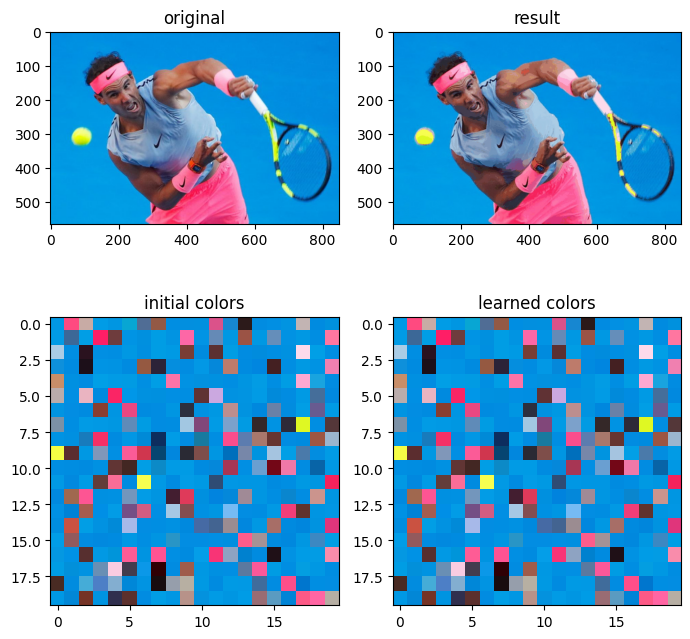

In [3]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

# read the image and return the RGB values for each pixel
img = plt.imread('nadal.jpg')

# reshaping the pixels matrix between 0 and 1
pixels = np.reshape(img, (img.shape[0]*img.shape[1], 3)) / 255.

# SOM initialization and training
print('Training SOM...')
som = MiniSom(20, 20, 3, learning_rate=0.05, neighborhood_function='bubble')
som.random_weights_init(pixels)
starting_weights = som.get_weights().copy()  # saving the starting weights
som.train(pixels, 10000, random_order=True, verbose=True)

print('quantization...')
qnt = som.quantization(pixels)  # quantize each pixels of the image
clustered = np.zeros(img.shape)
for i, q in enumerate(qnt):  # place the quantized values into a new image
    clustered[np.unravel_index(i, shape=(img.shape[0], img.shape[1]))] = q
# show the result
plt.figure(figsize=(7, 7))
plt.figure(1)
plt.subplot(221)
plt.title('original')
plt.imshow(img)
plt.subplot(222)
plt.title('result')
plt.imshow(clustered)

plt.subplot(223)
plt.title('initial colors')
plt.imshow(starting_weights, interpolation='none')
plt.subplot(224)
plt.title('learned colors')
plt.imshow(som.get_weights(), interpolation='none')

plt.tight_layout()
plt.show()

<h3><b>Ερωτήσεις</b><h3>
<ul>
<li>Να περιγράψετε συνοπτικά τη λειτουργία των <i>SOM</i>.</li>
<li>Να αναφέρετε ενδεικτικές εφαρμογές των <i>SOM</i>.</li>
<li>Με τη βοήθεια της εκφώνησης και του διαθέσιμου κώδικα να περιγράψετε συνοπτικά τη λογική με την οποία πραγματοποιείται η συμπίεση των εικόνων της άσκησης.</li>
<li>Να τρέξετε τον κώδικα με μέγεθος πλέγματος 2x2 αρκετές φορές. Τι παρατηρείτε σχετικά με τη διακύμανση των τιμών του σφάλματος κβάντισης; Να αιτιολογήσετε γιατί συμβαίνει αυτό εξετάζοντας τον κώδικα της άσκησης.</li>
<li>Να τρέξετε τον κώδικα της άσκησης για μεγέθη πλέγματος <i>SOM</i> 2x2, 3x3, 4x4, ..., 15x15, διατηρώντας το πλέγμα τετραγωνικό. Να σχεδιάσετε σε ένα γράφημα τις τιμές του σφάλματος κβάντισης. Τι παρατηρείτε σχετικά με την εξέλιξη της τιμής του σφάλματος κβάντισης, καθώς αυξάνεται το μέγεθος του πλέγματος;</li>
<li>Βασισμένοι στα αποτελέσματα των προηγούμενων ερωτημάτων να επιλέξετε, κατά προσέγγιση, το κατάλληλο μέγεθος πλέγματος που προσφέρει μία ικανοποιητική ανακατασκευή της αρχικής εικόνας, δηλαδή επιστρέφει αποδεκτό σφάλμα κβάντισης και αποδεκτό μέγεθος συμπίεσης.
</li>
<li>Να εφαρμόσετε το SOM grid που λάβατε στα προηγούμενα ερωτήματα για μία άλλη εικόνα του Nadal (<a href="https://github.com/nkostopoulos/StochasticsLabPublic/tree/master/lab2/nadal2.jpg">nadal2.jpg</a>), που προέρχεται από τον ίδιο αγώνα. Η εικόνα αυτή έχει περίπου το ίδιο μέγεθος με την αρχική εικόνα. Τι παρατηρείτε; Στην περίπτωση που δίνατε ως είσοδο στο SOM έναν άλλο τενίστα, θα είχατε το ίδιο καλά αποτελέσματα;</li>
</ul>

ΑΠΑΝΤΗΣΕΙΣ:


i) Self-organizing Maps (SOM):
Το SOM είναι ένας τύπος τεχνητού νευρωνικού δικτύου που είναι ιδιαίτερα χρήσιμος για την αντιστοίχηση και την ομαδοποίηση των δεδομένων σε δισδιάστατο χώρο.
Κατά τη διάρκεια της εκπαίδευσης, επιλέγεται ένα δείγμα από τα δεδομένα και αναζητείται ο κόμβος του χάρτη που είναι πιο κοντά σε αυτό το δείγμα. Ο κόμβος αυτός και οι κοντινότεροι κόμβοι προσαρμόζουν τα βάρη τους για να είναι πιο κοντά στα δεδομένα.
Οι SOM εκπαιδεύονται για πολλά δείγματα εώς ότου ο χάρτης συγκλίνει και επιτυγχάνεται η κατάλληλη οργάνωση των νευρώνων σύμφωνα με την τοπολογία των δεδομένων.
Οι SOM είναι χρήσιμοι για την ανίχνευση πολυδιάστατων πολύπλοκων σχέσεων σε δεδομένα και για την ομαδοποίηση των δεδομένων σε παροχές με παρόμοιες ιδιότητες. Συχνά, χρησιμοποιείται για οπτικοποίηση και εξαγωγή δομικών πληροφοριών από πολυ-διάστατα δεδομένα.




ii)Οι SOM μπορούν να χρησιμοποιηθούν ως εξής:

Σην εξόρυξη προτύπων και δομών από μεγάλα σύνολα δεδομένων.Συγκεκριμένα, με τη χρήση SOM, είναι δυνατή η ανίχνευση συστάδων, η ανίχνευση ανωμαλιών και η ανίχνευση περιοχών συγκέντρωσης.

Σην ομαδοποίηση και κατάταξη δεδομένων. Σε αυτήν την εφαρμογή, οι SOM μπορεί να δημιουργήσει μια τοπολογική απεικόνιση των δεδομένων που βοηθά στην εύκολη κατανόηση και ανάλυση των παρατηρήσεων.

Στην αναγνώριση προτύπων και κατηγοριοποίηση δεδομένων. Αυτό μπορεί να εφαρμοστεί σε προβλήματα όπως η ταξινόμηση εικόνων, η ανίχνευση προτύπων σε αριθμούς ή γράμματα, και η ανίχνευση ανωμαλιών.

Στην ανάλυση εικόνας και σήματος. Χρησιμοποιούνται συχνά για τη συμπίεση εικόνων, την ανίχνευση χαρακτηριστικών σε εικόνες και την ανίχνευση προτύπων σε σήματα.

iii)Στη συγκεκριμένη άσκηση, μια εικόνα χρησιμοποιείται για την εκπαίδευση ενός SOM, το οποίο πραγματοποιεί κβάντωση (quantization) των χρωμάτων της εικόνας προκειμένου να αποκτήσει ένα μικρότερο σύνολο χρωμάτων. Χρησιμοποιώντας το νέο, μικρότερο αυτό σύνολο, το SOM απεικονίζει την εικόνα εκ νέου, συσταδοποιώντας περιοχές με παρόμοιες αποχρώσεις οι οποίες δε διακρίνονται πλέον ως διαφορετικά χρώματα. Έτσι, γειτονιές οι οποίες στην αρχική εικόνα περιγράφονταν από διαφορετικές αποχρώσεις, απεικονίζονται τώρα μέσω του SOM σε γειτονιές με μικρότερο αριθμό αποχρώσεων (ενδεχομένως και μία μοναδική απόχρωση) και μειώνοντας έτσι πρακτικά την ανάλυση (resolution) της εικόνας.

iv)

Training SOM...
2
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.20737095573040246


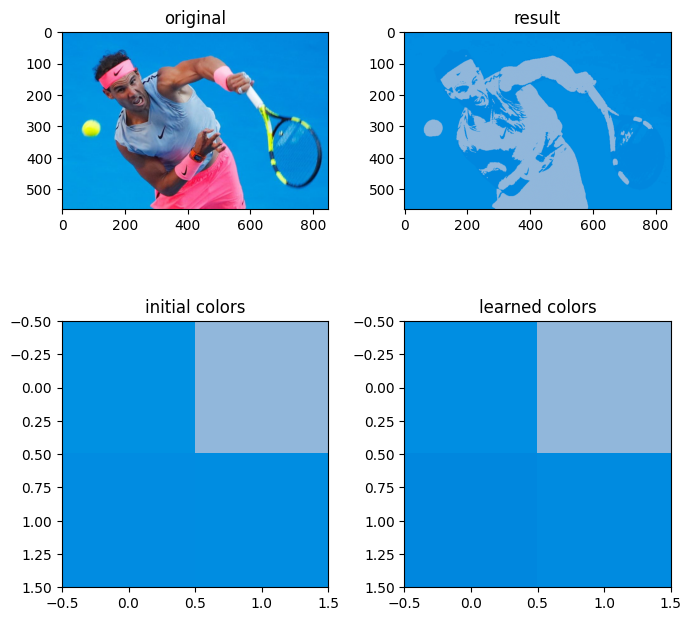

Training SOM...
3
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.17929848025702236


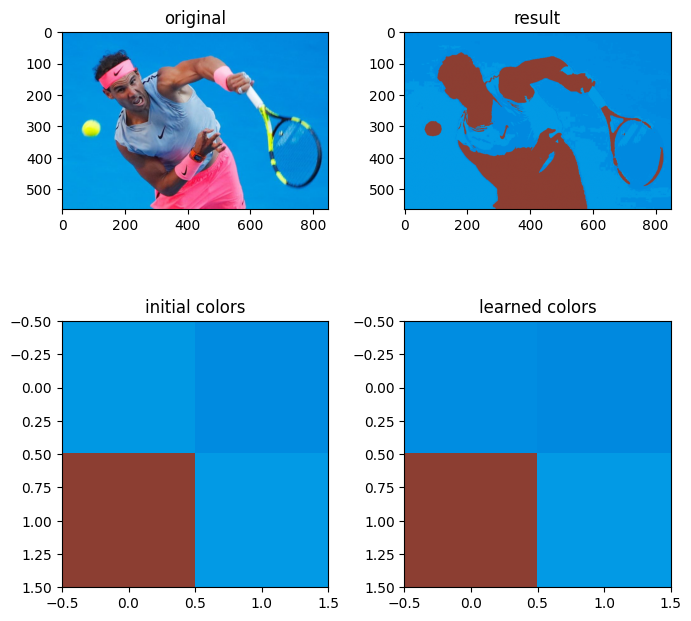

Training SOM...
4
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.2908542780211058


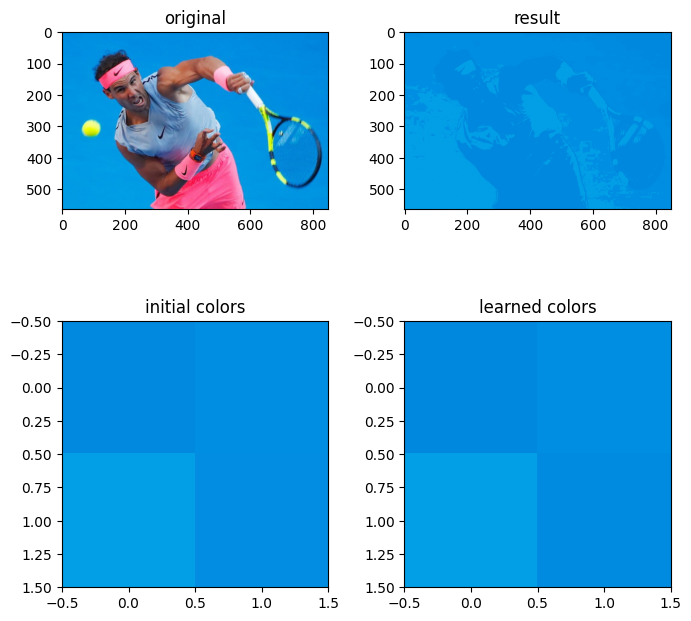

Training SOM...
5
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.13476058010623923


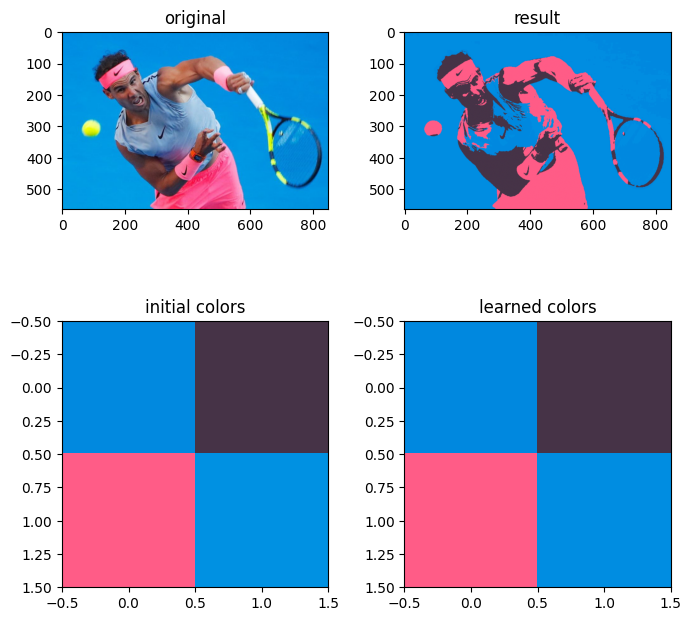

Training SOM...
6
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.12877906555710492


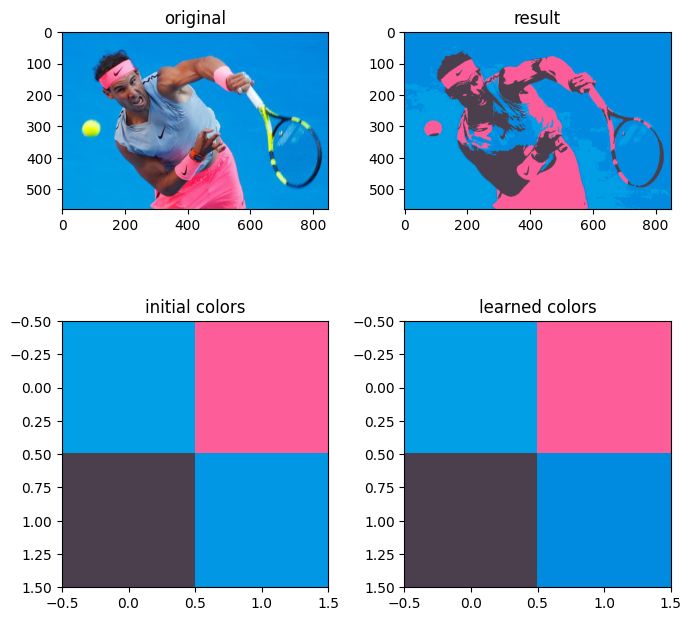

Training SOM...
7
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.14362067582748417


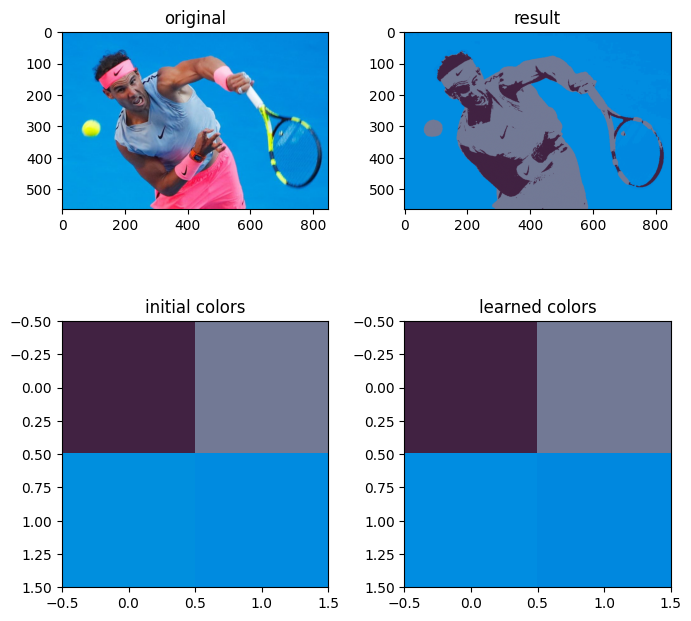

Training SOM...
8
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.18127600534748073


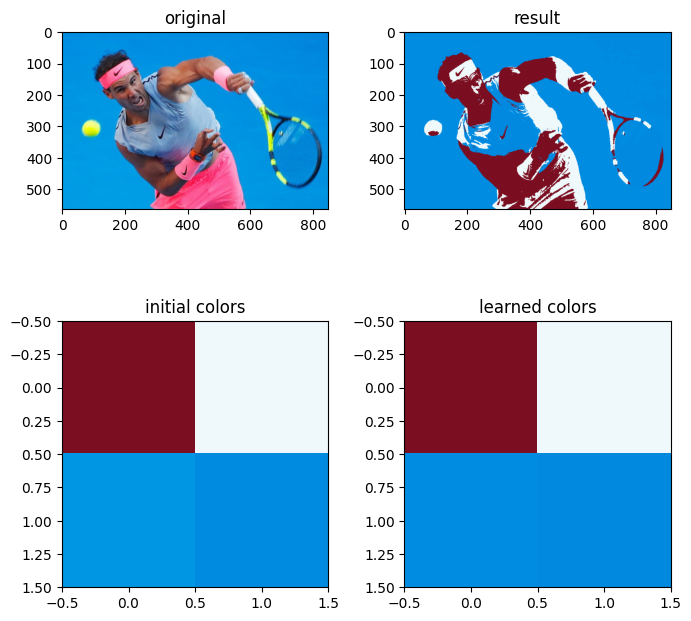

Training SOM...
9
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.14439618523147596


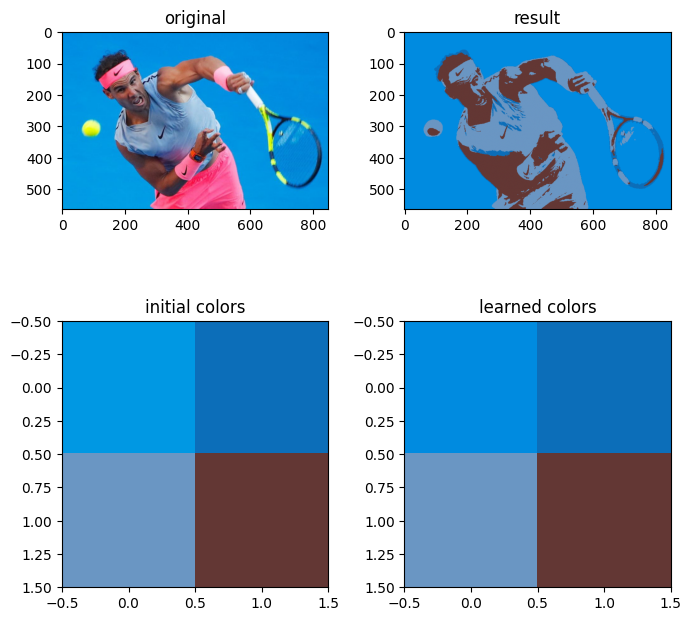

Training SOM...
10
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.2909231439588455


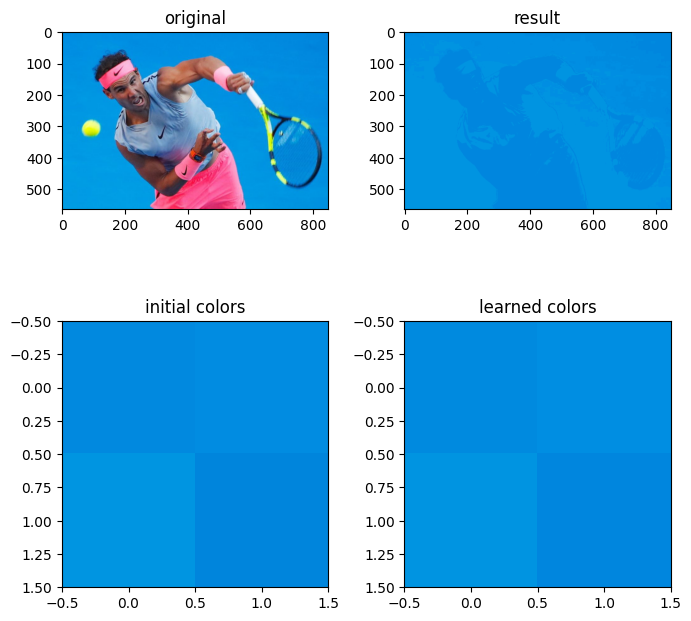

Training SOM...
11
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.1473205209668605


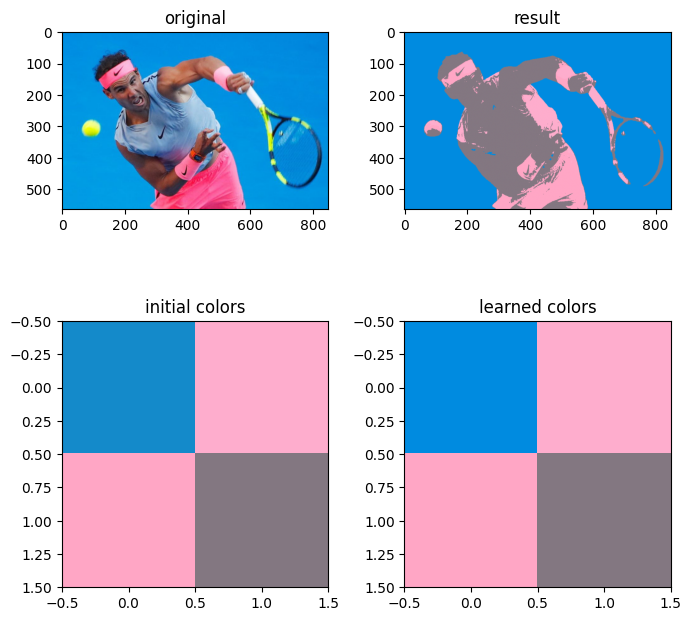

Training SOM...
12
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.25476124307371156


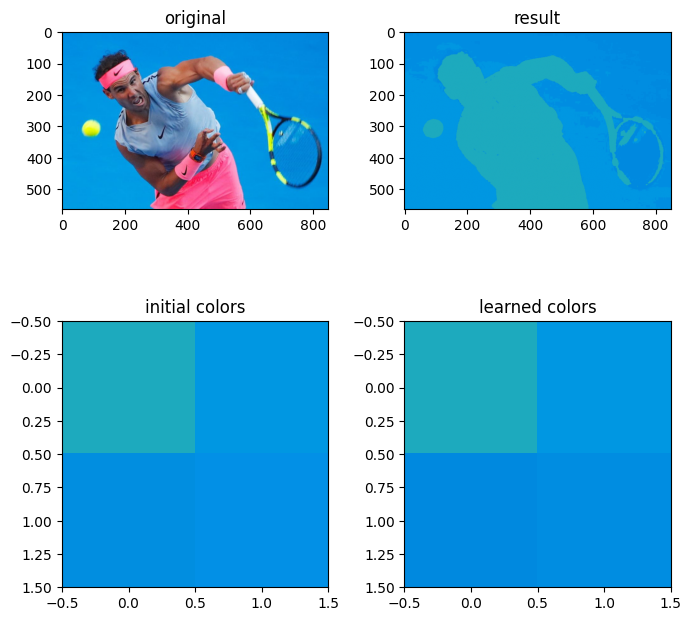

Training SOM...
13
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.16685042307622777


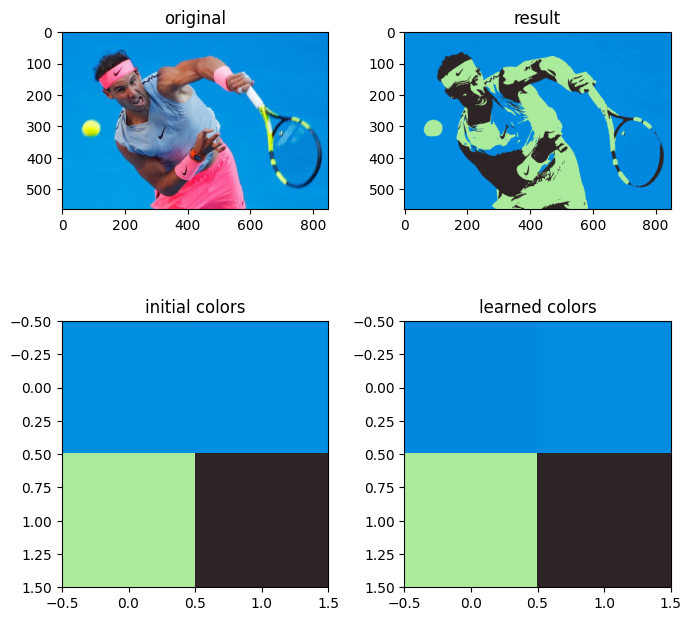

Training SOM...
14
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.14627692832804282


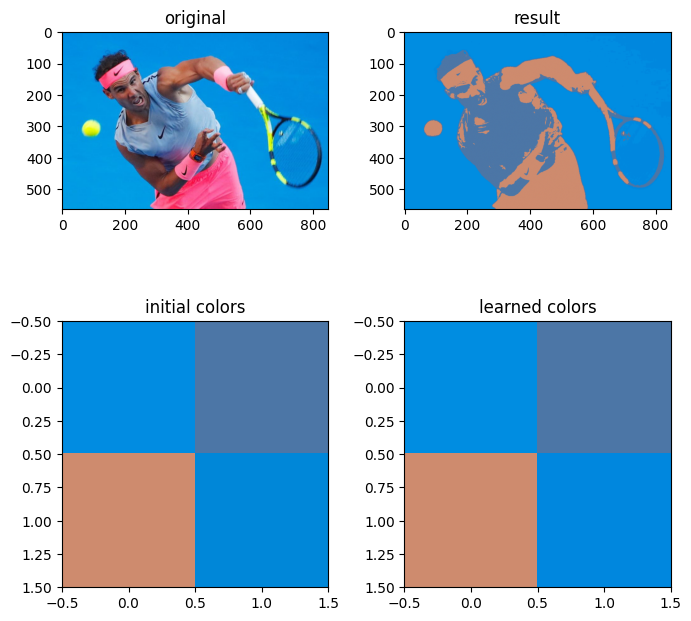

Training SOM...
15
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.1301177477808788


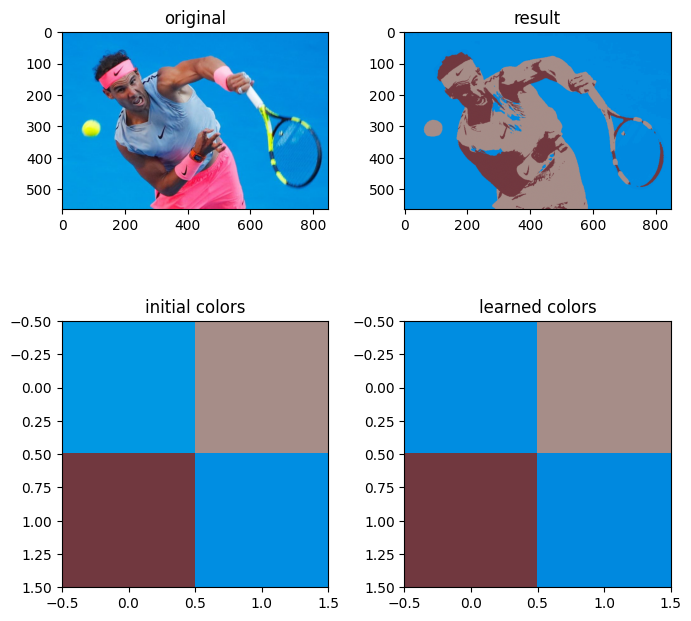

In [4]:


reps = range(2,16)
for rep in reps:
  rep=int(rep)
  pixels = np.reshape(img, (img.shape[0]*img.shape[1], 3)) / 255.
  # SOM initialization and training
  print('Training SOM...')
  size=int(rep)
  print(size)
  som = MiniSom(2,2, 3, learning_rate=0.05, neighborhood_function='bubble')
  som.random_weights_init(pixels)
  starting_weights = som.get_weights().copy()  # saving the starting weights
  som.train(pixels, 10000, random_order=True, verbose=True)

  qnt_error = som.quantization_error(pixels)


  #print('quantization...')
  qnt = som.quantization(pixels)  # quantize each pixels of the image
  clustered = np.zeros(img.shape)
  for i, q in enumerate(qnt):  # place the quantized values into a new image
      clustered[np.unravel_index(i, shape=(img.shape[0], img.shape[1]))] = q

  plt.figure(figsize=(7, 7))
  plt.figure(1)
  plt.subplot(221)
  plt.title('original')
  plt.imshow(img)
  plt.subplot(222)
  plt.title('result')
  plt.imshow(clustered)

  plt.subplot(223)
  plt.title('initial colors')
  plt.imshow(starting_weights, interpolation='none')
  plt.subplot(224)
  plt.title('learned colors')
  plt.imshow(som.get_weights(), interpolation='none')

  plt.tight_layout()
  plt.show()

Παρατηρούμε ότι παρότι εκτελούμε τον ίδιο κώδικα 15 φορές, σε κάθε επανάληψη προκύπτει ένα διαφορτικό αποτέλεσμα.Αυτό σημαίνει ότι δεν υπάρχουν εμφανής διαφορές μόνο στην εικόνα που εκπαιδεύτηκε,άλλα και στο σφάλμα κβάντωσης.Το σφλαμα κβάντωσης μεγιστοποιείται στην 3η και στην 10η επανάληψη με 0.29 και έχει ελάχιστη τιμή στην 5η και στην 15η επανάληψη με σφάλμα κβάντωσης 0.13.Συνεπώς, η εκπαίδευση των δεδομένων πλησιάζουν τη πραγματικότητα κατά κάποιο τρόπο στην 5η και στην 15η επανάληψη. Οι υπόλοιπες τιμές κυμαίνονται από 0.13 έως 0.29.

Ανάλογα με το εάν το SOM θα εκπαιδευτεί για να αναγνωρίζει αποχρώσεις του μπλε ή για να αναγνωρίζει, για παράδειγμα, το μπλε και το ροζ, η τελική αναπαράσταση της εικόνας θα είναι πολύ διαφορετική. Συνπώς, διαφορετικό θα είναι και το σφάλμα κβάντωσης σε σχέση με την αρχική εικόνα. Εξάλλου δεν είναι παρά ένα μέτρο της πληροφορίας που απουσιάζει από το τελικό output λόγω της δράσης του SOM.

v)

Training SOM...
2
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.18241985179015752


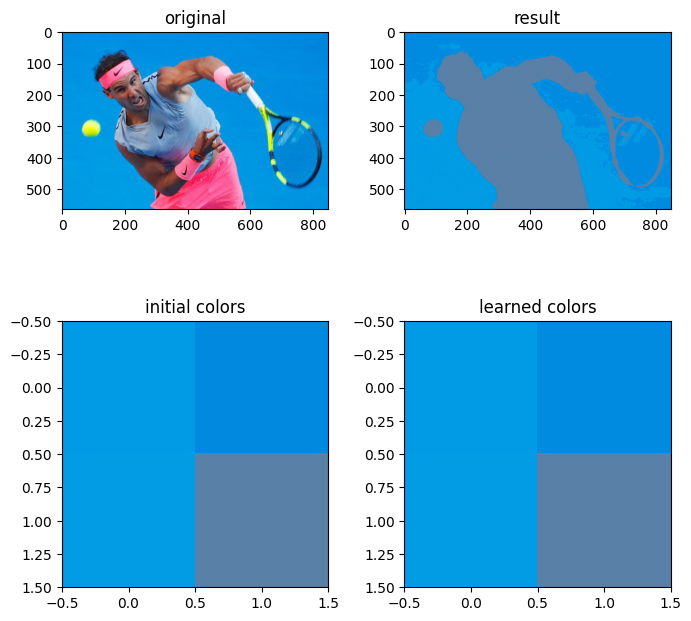

Training SOM...
3
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.11953078338098658


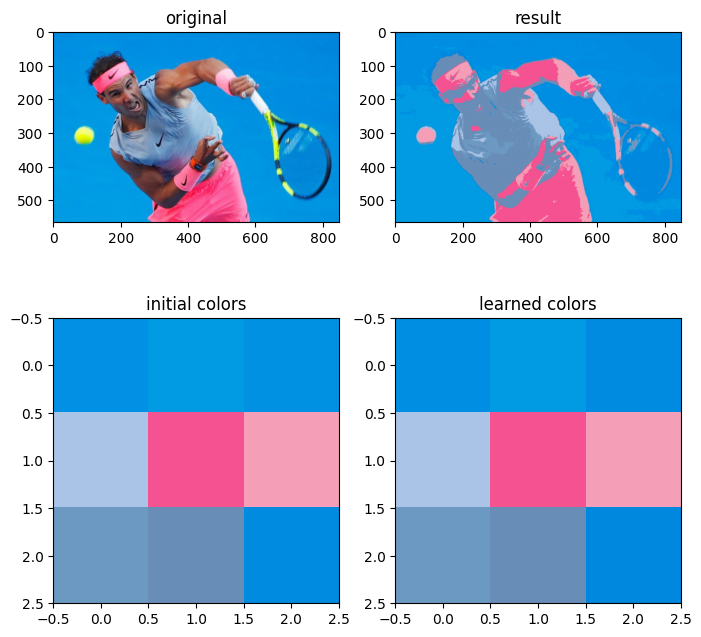

Training SOM...
4
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.09948107295898376


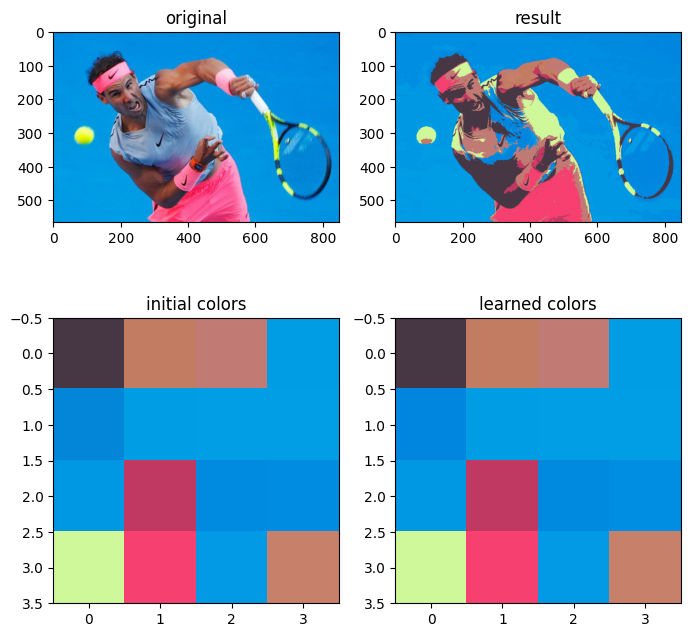

Training SOM...
5
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.08555131337203228


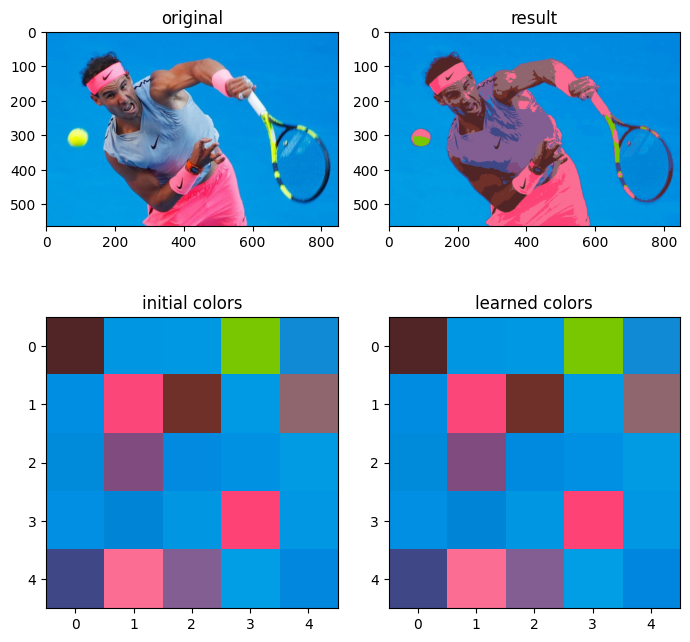

Training SOM...
6
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.04751916778672855


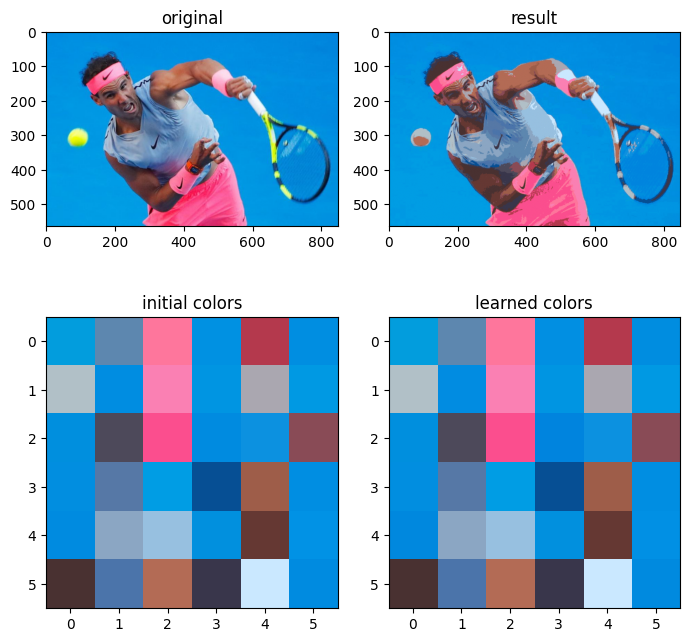

Training SOM...
7
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.05207532670522725


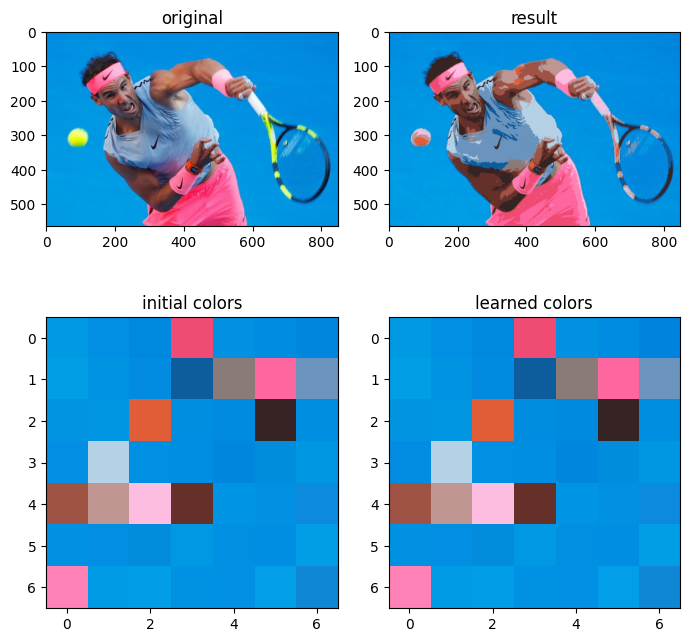

Training SOM...
8
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.04605411171108846


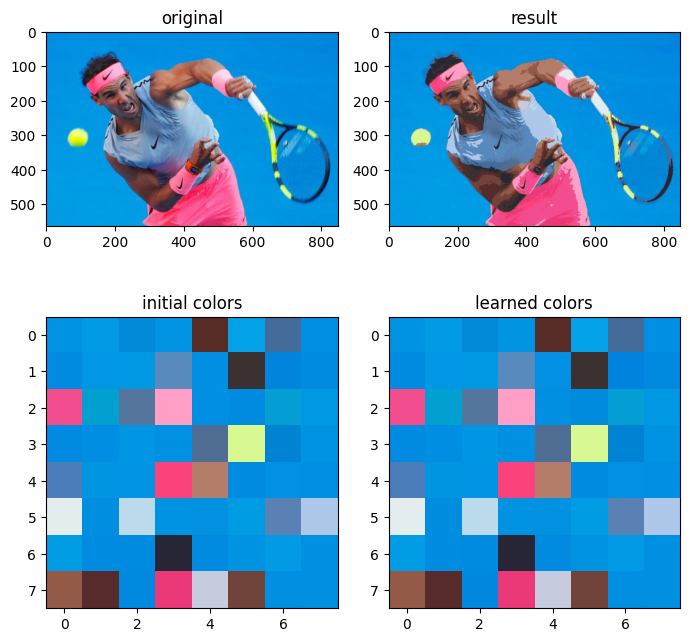

Training SOM...
9
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.03929034096805832


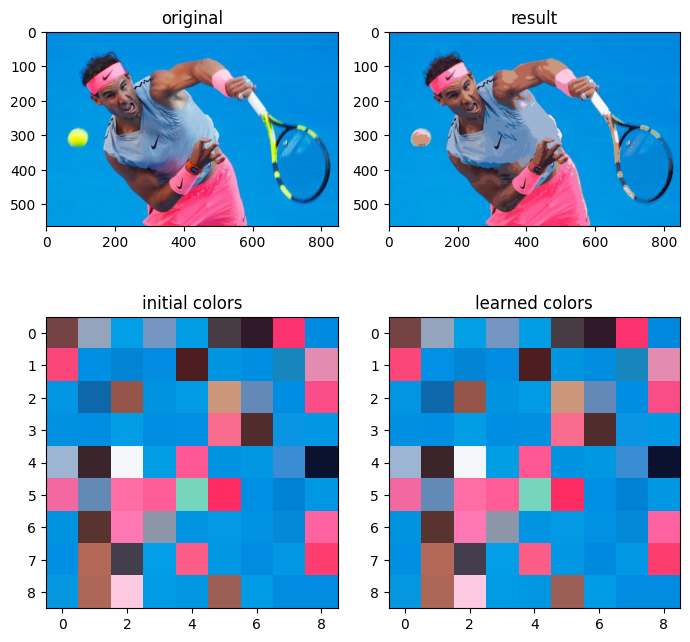

Training SOM...
10
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.0361493989008234


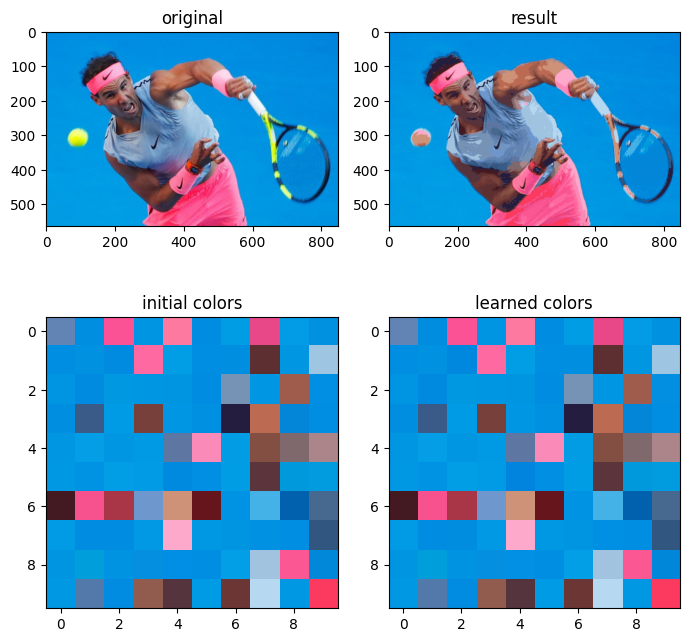

Training SOM...
11
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.03794488032685333


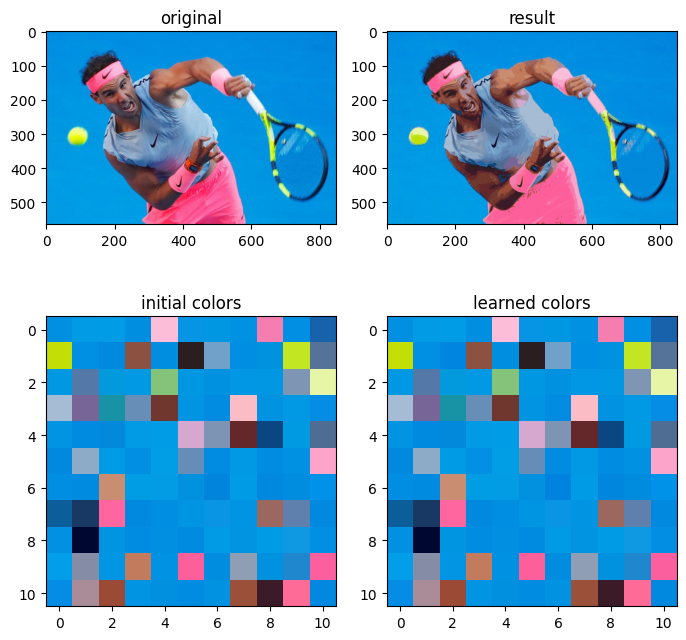

Training SOM...
12
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.034718021102090206


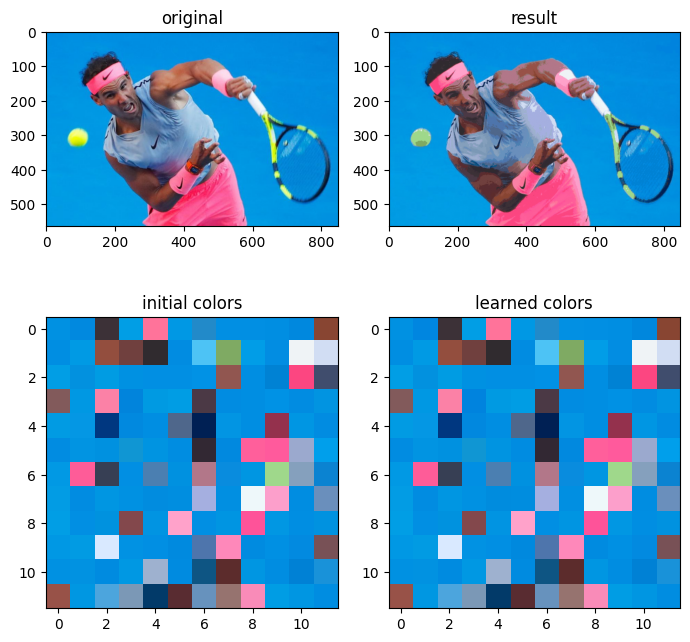

Training SOM...
13
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.0305309165702307


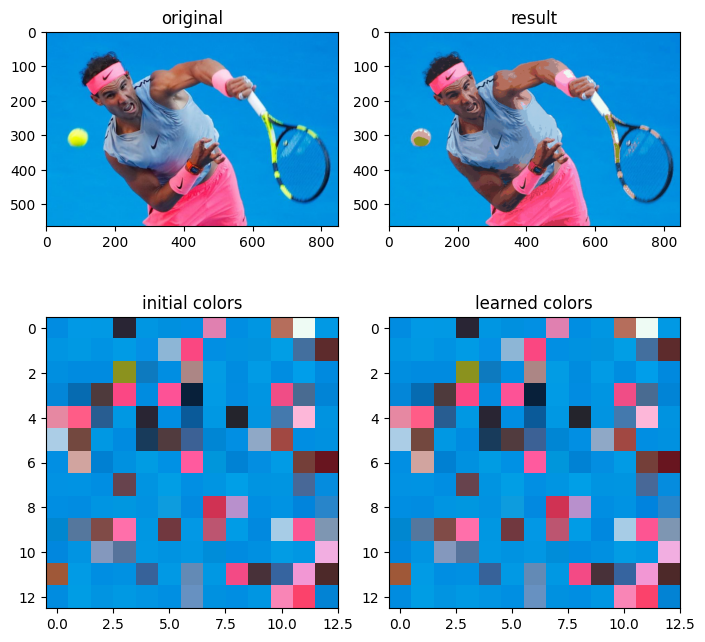

Training SOM...
14
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.0303486918780755


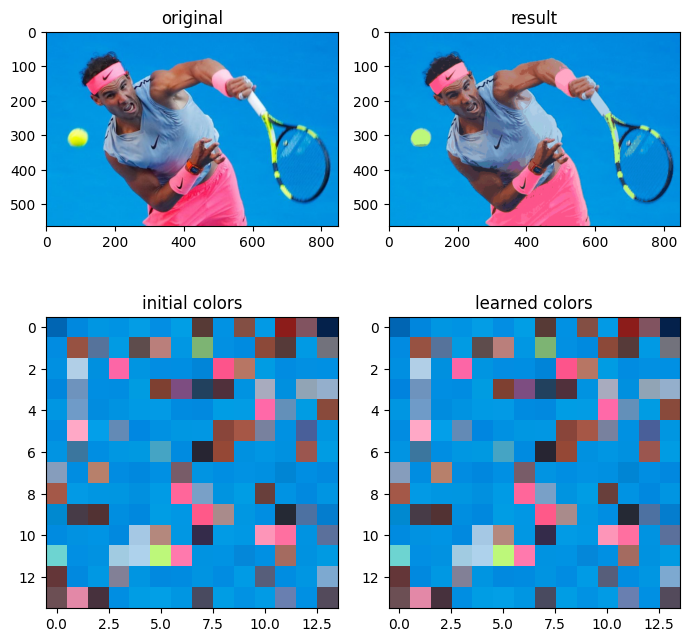

Training SOM...
15
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.025939072106156535


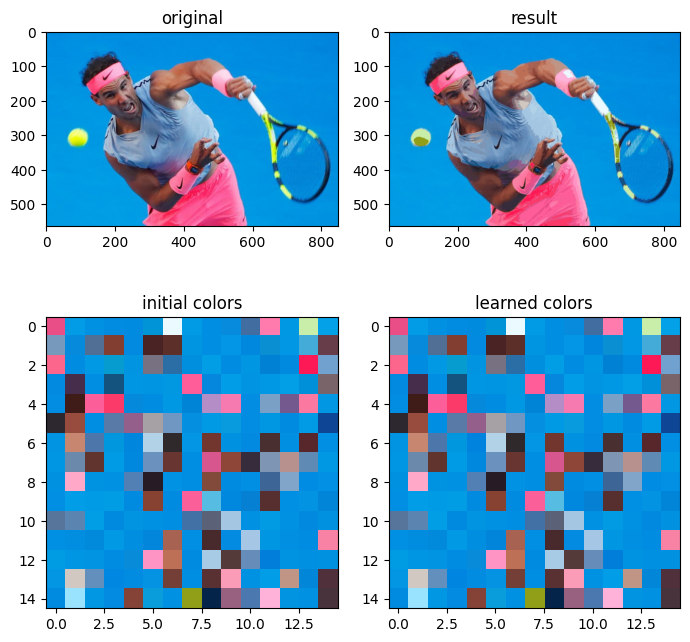

In [5]:


qnt_list=[]
reps = range(2,16)
for rep in reps:
  rep=int(rep)
  pixels = np.reshape(img, (img.shape[0]*img.shape[1], 3)) / 255.
  # SOM initialization and training
  print('Training SOM...')
  size=int(rep)
  print(size)
  som = MiniSom(size,size, 3, learning_rate=0.05, neighborhood_function='bubble')
  som.random_weights_init(pixels)
  starting_weights = som.get_weights().copy()  # saving the starting weights
  som.train(pixels, 10000, random_order=True, verbose=True)

  qnt_error = som.quantization_error(pixels)
  qnt_list.append(qnt_error)

  #print('quantization...')
  qnt = som.quantization(pixels)  # quantize each pixels of the image
  clustered = np.zeros(img.shape)
  for i, q in enumerate(qnt):  # place the quantized values into a new image
      clustered[np.unravel_index(i, shape=(img.shape[0], img.shape[1]))] = q

  plt.figure(figsize=(7, 7))
  plt.figure(1)
  plt.subplot(221)
  plt.title('original')
  plt.imshow(img)
  plt.subplot(222)
  plt.title('result')
  plt.imshow(clustered)

  plt.subplot(223)
  plt.title('initial colors')
  plt.imshow(starting_weights, interpolation='none')
  plt.subplot(224)
  plt.title('learned colors')
  plt.imshow(som.get_weights(), interpolation='none')

  plt.tight_layout()
  plt.show()





Παρατηρούε ότι καθώς αυξάνεται ο αριθμός του πλέγματος, το σφάλμα κβάντωσης μειώνεται, Επίσης, η φωτογραφία πάνω στην οποία εκτελείται ο αλγόριθμος SOM μοιάζει όλο και πιο πολύ στην αρχική ανεπεξέργαστη εικόνα. Επίσης, καθώς αυξάνεται ο αριθμός του πλέγματος, ταυτόχρονα μειώνεται το σφάλμα κβάντωσης.Συνεπώς, όσο πιο μικρό σφάλμα κβάντωσης, τόσο πιο  κοντά στην πραγματικότητα είναι η επεξεργασμένη εικόνα.Με βάση τα παραπάνω, ο ιδανικόα αριθμός πλέγματος είναι 15Χ15.

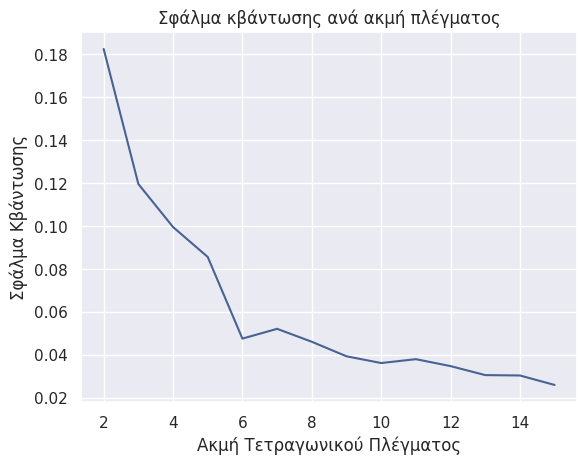

In [6]:
import seaborn as sns
sns.set(style = "darkgrid")
mycol = (72/255, 99/255, 147/255)

fig, ax = plt.subplots()

ax.plot(reps, qnt_list, color=mycol)
ax.set_xlabel('Ακμή Τετραγωνικού Πλέγματος')
ax.set_ylabel('Σφάλμα Κβάντωσης')
ax.set_title('Σφάλμα κβάντωσης ανά ακμή πλέγματος')
plt.show()

Το παραπάνω διάγραμμα δείχνει το σφάλμα κβάντωσης συναρτήσει του τετραγωνικού πλέγματος. Εμφανίζεται ένας αγκώνας, το οποίο θυμίζει την μέθοδο elbow,  από τον αλγόριθμο k means. Όποτε έχοντας αυτό στου νου και παρ΄όλο που το μικρότερο σφάλμα, εμφανίζεται για πλέγμα 15Χ15, δεν πρέπει να μην παρατηρήσουμε το πλέγμα 6X6, όπου αρχίζει να σταθεροποιείται η μείσωση του σφάλματος κβάντωσης.

vii)

Training SOM...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.011122014570257764
quantization...


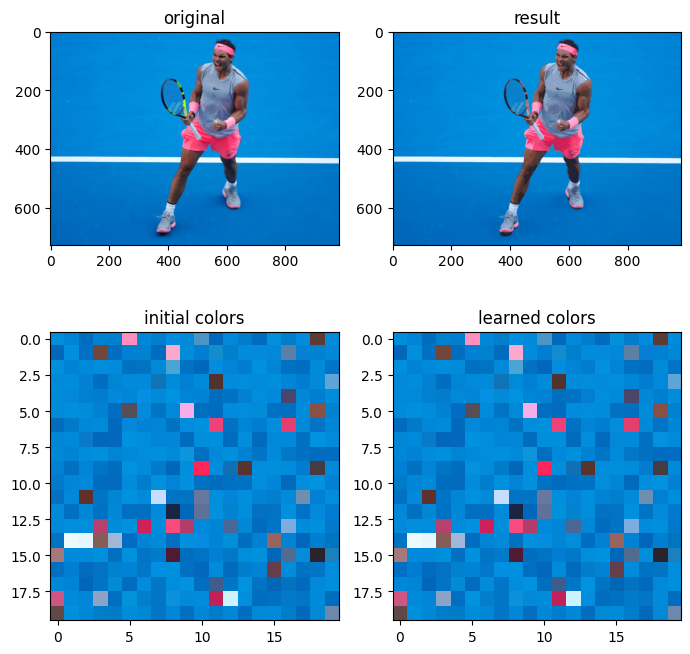

In [3]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

# read the image and return the RGB values for each pixel
img = plt.imread('nadal2.jpg')

# reshaping the pixels matrix between 0 and 1
pixels = np.reshape(img, (img.shape[0]*img.shape[1], 3)) / 255.

# SOM initialization and training
print('Training SOM...')
som = MiniSom(20, 20, 3, learning_rate=0.05, neighborhood_function='bubble')
som.random_weights_init(pixels)
starting_weights = som.get_weights().copy()  # saving the starting weights
som.train(pixels, 10000, random_order=True, verbose=True)

print('quantization...')
qnt = som.quantization(pixels)  # quantize each pixels of the image
clustered = np.zeros(img.shape)
for i, q in enumerate(qnt):  # place the quantized values into a new image
    clustered[np.unravel_index(i, shape=(img.shape[0], img.shape[1]))] = q

# show the result
plt.figure(figsize=(7, 7))
plt.figure(1)
plt.subplot(221)
plt.title('original')
plt.imshow(img)
plt.subplot(222)
plt.title('result')
plt.imshow(clustered)

plt.subplot(223)
plt.title('initial colors')
plt.imshow(starting_weights, interpolation='none')
plt.subplot(224)
plt.title('learned colors')
plt.imshow(som.get_weights(), interpolation='none')

plt.tight_layout()
plt.show()

Training SOM...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.016541057368313388
quantization...


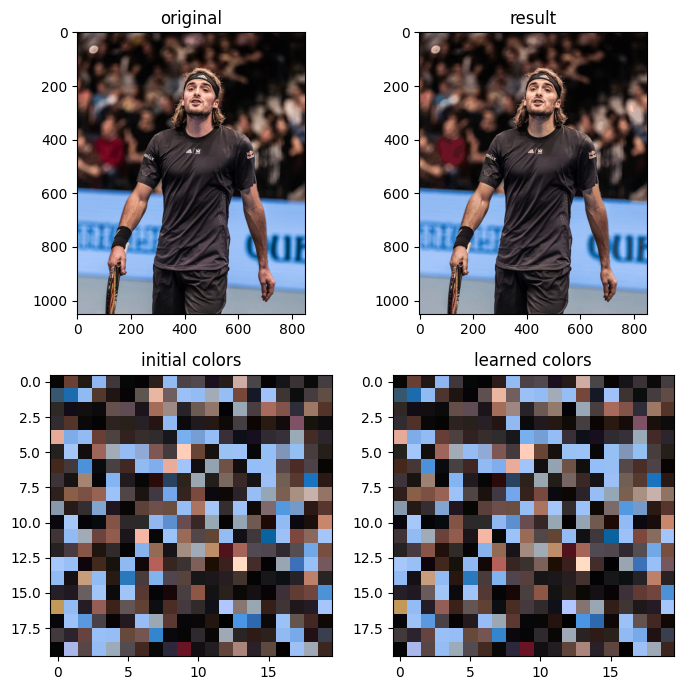

In [4]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

# read the image and return the RGB values for each pixel
img = plt.imread('tsitsipas.jpg')

# reshaping the pixels matrix between 0 and 1
pixels = np.reshape(img, (img.shape[0]*img.shape[1], 3)) / 255.

# SOM initialization and training
print('Training SOM...')
som = MiniSom(20, 20, 3, learning_rate=0.05, neighborhood_function='bubble')
som.random_weights_init(pixels)
starting_weights = som.get_weights().copy()  # saving the starting weights
som.train(pixels, 10000, random_order=True, verbose=True)

print('quantization...')
qnt = som.quantization(pixels)  # quantize each pixels of the image
clustered = np.zeros(img.shape)
for i, q in enumerate(qnt):  # place the quantized values into a new image
    clustered[np.unravel_index(i, shape=(img.shape[0], img.shape[1]))] = q

# show the result
plt.figure(figsize=(7, 7))
plt.figure(1)
plt.subplot(221)
plt.title('original')
plt.imshow(img)
plt.subplot(222)
plt.title('result')
plt.imshow(clustered)

plt.subplot(223)
plt.title('initial colors')
plt.imshow(starting_weights, interpolation='none')
plt.subplot(224)
plt.title('learned colors')
plt.imshow(som.get_weights(), interpolation='none')

plt.tight_layout()
plt.show()

Training SOM...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.02233677554081152
quantization...


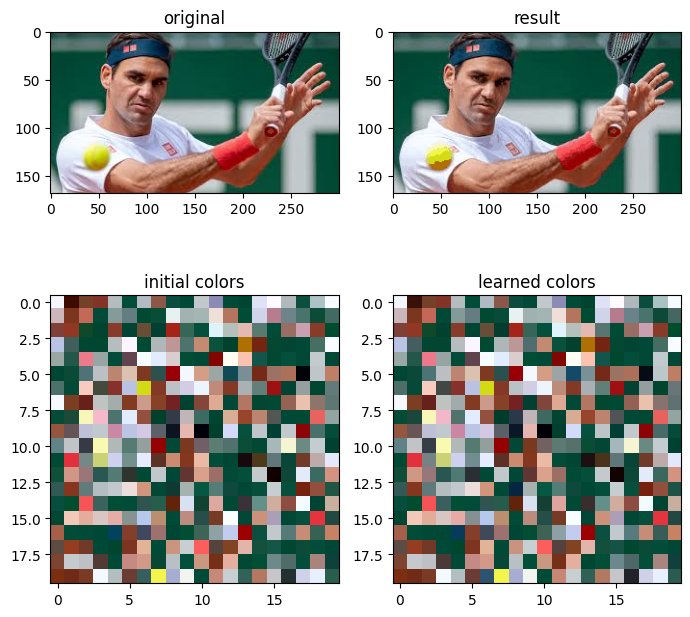

In [2]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

# read the image and return the RGB values for each pixel
img = plt.imread('roger.jpg')

# reshaping the pixels matrix between 0 and 1
pixels = np.reshape(img, (img.shape[0]*img.shape[1], 3)) / 255.

# SOM initialization and training
print('Training SOM...')
som = MiniSom(20, 20, 3, learning_rate=0.05, neighborhood_function='bubble')
som.random_weights_init(pixels)
starting_weights = som.get_weights().copy()  # saving the starting weights
som.train(pixels, 10000, random_order=True, verbose=True)

print('quantization...')
qnt = som.quantization(pixels)  # quantize each pixels of the image
clustered = np.zeros(img.shape)
for i, q in enumerate(qnt):  # place the quantized values into a new image
    clustered[np.unravel_index(i, shape=(img.shape[0], img.shape[1]))] = q

# show the result
plt.figure(figsize=(7, 7))
plt.figure(1)
plt.subplot(221)
plt.title('original')
plt.imshow(img)
plt.subplot(222)
plt.title('result')
plt.imshow(clustered)

plt.subplot(223)
plt.title('initial colors')
plt.imshow(starting_weights, interpolation='none')
plt.subplot(224)
plt.title('learned colors')
plt.imshow(som.get_weights(), interpolation='none')

plt.tight_layout()
plt.show()

Το εκπαιδευμένο μοντέλο πραγματοποιεί μια ικανοποιητική απεικόνιση. Όπως γίνεται εύκολα αντιληπτό σημασία δεν έχει ο τενίστας που απεικονίζεται , όσο τα χρώματα της αρχικής εικόνας πάνω στα οποία πραγματοποίησε το SOM την κβάντωση.